In [1]:
import pandas as pd

df = pd.read_csv('./datas/mpg.csv', header=0)       # CSV 파일을 읽어서 DataFrame 객체로 변환, 첫 번째 행을 열 이름으로 사용
print(df.head())                            # DataFrame 객체의 처음 5개 행 출력

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


In [2]:
df_copy = df.copy()     # DataFrame 객체 복사
print(df_copy.head())   # DataFrame 객체의 처음 5개 행 출력

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


In [4]:
df_copy.rename(columns={'cty': 'city'}, inplace=True)    # 열 이름 변경
df_copy.rename(columns={'hwy': 'highway'}, inplace=True)    # 열 이름 변경
print(df_copy.head())   # DataFrame 객체의 처음 5개 행 출력

  manufacturer model  displ  year  cyl       trans drv  city  highway fl  \
0         audi    a4    1.8  1999    4    auto(l5)   f    18       29  p   
1         audi    a4    1.8  1999    4  manual(m5)   f    21       29  p   
2         audi    a4    2.0  2008    4  manual(m6)   f    20       31  p   
3         audi    a4    2.0  2008    4    auto(av)   f    21       30  p   
4         audi    a4    2.8  1999    6    auto(l5)   f    16       26  p   

  category  
0  compact  
1  compact  
2  compact  
3  compact  
4  compact  


In [5]:
df_copy['avg'] = (df_copy['city'] + df_copy['highway']) /2    # 새로운 열 추가
print(df_copy.head())   # DataFrame 객체의 처음 5개 행 출력

  manufacturer model  displ  year  cyl       trans drv  city  highway fl  \
0         audi    a4    1.8  1999    4    auto(l5)   f    18       29  p   
1         audi    a4    1.8  1999    4  manual(m5)   f    21       29  p   
2         audi    a4    2.0  2008    4  manual(m6)   f    20       31  p   
3         audi    a4    2.0  2008    4    auto(av)   f    21       30  p   
4         audi    a4    2.8  1999    6    auto(l5)   f    16       26  p   

  category   avg  
0  compact  23.5  
1  compact  25.0  
2  compact  25.5  
3  compact  25.5  
4  compact  21.0  


In [6]:
df_copy.to_csv('./datas/mpg_copy.csv', index=False)    # DataFrame 객체를 CSV 파일로 저장

연비 평균을 기준으로 합격 여부 판정 및 통계 구하기
- 연비 평균 구하기(도시연비, 고속도록 연비)
- 합격 판정 컬럼 생성
    - 평균값을 기준으로 이상이면 pass, 아니면 fail 값을 할당 
    - numpy.where()
- 합격 빈도표 생성(df.value_counts())
- 시각화(막대 그래프 - plt.bar())

In [7]:
import pandas as pd 

df = pd.read_csv('./datas/mpg.csv', header=0)       # CSV 파일을 읽어서 DataFrame 객체로 변환, 첫 번째 행을 열 이름으로 사용
print(df.head())                            # DataFrame 객체의 처음 5개 행 출력

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


In [9]:
df['avg'] = (df['cty'] + df['hwy']) / 2    # 새로운 열 추가
print(df.describe())    # DataFrame 객체의 요약 통계 정보 출력

            displ         year         cyl         cty         hwy         avg
count  234.000000   234.000000  234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171   20.149573
std      1.291959     4.509646    1.611534    4.255946    5.954643    5.050290
min      1.600000  1999.000000    4.000000    9.000000   12.000000   10.500000
25%      2.400000  1999.000000    4.000000   14.000000   18.000000   15.500000
50%      3.300000  2003.500000    6.000000   17.000000   24.000000   20.500000
75%      4.600000  2008.000000    8.000000   19.000000   27.000000   23.500000
max      7.000000  2008.000000    8.000000   35.000000   44.000000   39.500000


In [10]:
import numpy as np
df['test'] = np.where(df['avg'] >= 20, 'pass', 'fail')    # 조건에 따라 새로운 열 추가
print(df.head())    # DataFrame 객체의 처음 5개 행 출력

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category  \
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact   
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact   
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact   
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact   
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact   

    avg  test  
0  23.5  pass  
1  25.0  pass  
2  25.5  pass  
3  25.5  pass  
4  21.0  pass  


In [12]:
print(df['test'].value_counts())    # 열의 고유값 개수 출력
count_test = df['test'].value_counts()
print(count_test)    # pass 횟수 출력    

test
pass    128
fail    106
Name: count, dtype: int64
test
pass    128
fail    106
Name: count, dtype: int64


<Axes: xlabel='test'>

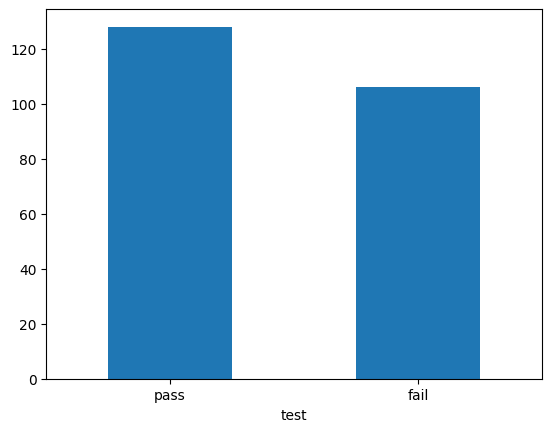

In [14]:
count_test.plot(kind='bar', rot=0)    # 막대 그래프 출력


연비 평균을 기준으로 자동차 연비 등급 표시(A, B, C)
- 연비 평균 구하기 
- 연비 등급 컬럼 생성(grade)
    - 평균값을 기준으로 자동차 연비 등급
    - 30이상 A, 20이상 B, 나머지 C
    - numpy.where(조건, 참일 때, 거짓일 때)
- 합격 빈도표 생성 
- 시각화

grade
B    118
C    106
A     10
Name: count, dtype: int64


<Axes: xlabel='grade'>

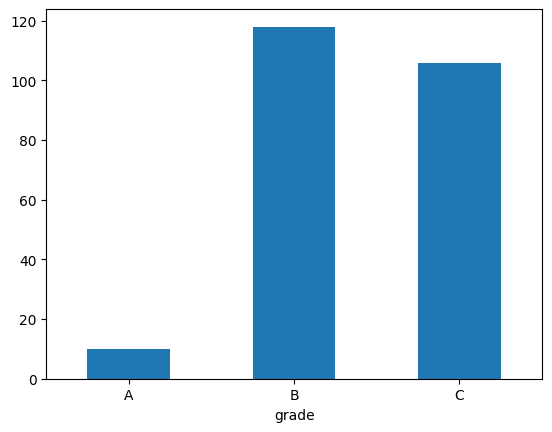

In [18]:
import pandas as pd 
import numpy as np

df = pd.read_csv('./datas/mpg.csv', header=0)       # CSV 파일을 읽어서 DataFrame 객체로 변환, 첫 번째 행을 열 이름으로 사용
df['avg'] = (df['cty'] + df['hwy']) / 2    # 새로운 열 추가
df['grade'] = np.where(df['avg'] >= 30, 'A', np.where(df['avg'] >= 20, "B", "C"))    # 조건에 따라 새로운 열 추가
print(df['grade'].value_counts())    # 열의 고유값 개수 출력
count_grade = df['grade'].value_counts()    # 열의 고유값 개수를 변수에 저장
count_grade = count_grade.sort_index()    # 인덱스를 기준으로 정렬
count_grade.plot(kind='bar', rot=0)    # 막대 그래프 출력